In [1]:
import pandas as pd
from plotnine import *

%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm
fontpath = '/Users/jiwoo/Library/Fonts/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [4]:
# 상가업소정보 데이터
shop_201806_01 = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/todaycodes/shop_201806_01.csv', encoding='cp949')
shop_201806_01.shape

(476183, 39)

In [5]:
# head를 통해 상위 몇 개의 데이터만을 본다
shop_201806_01.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196


In [6]:
# 생각보다 결측치가 많다.
shop_201806_01.isnull().sum()

상가업소번호            0
상호명               1
지점명          416061
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      27664
표준산업분류명       27664
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         80599
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        413186
건물관리번호            0
건물명          265997
도로명주소             0
구우편번호             0
신우편번호             9
동정보          433303
층정보          184584
호정보          405945
경도                0
위도                0
dtype: int64

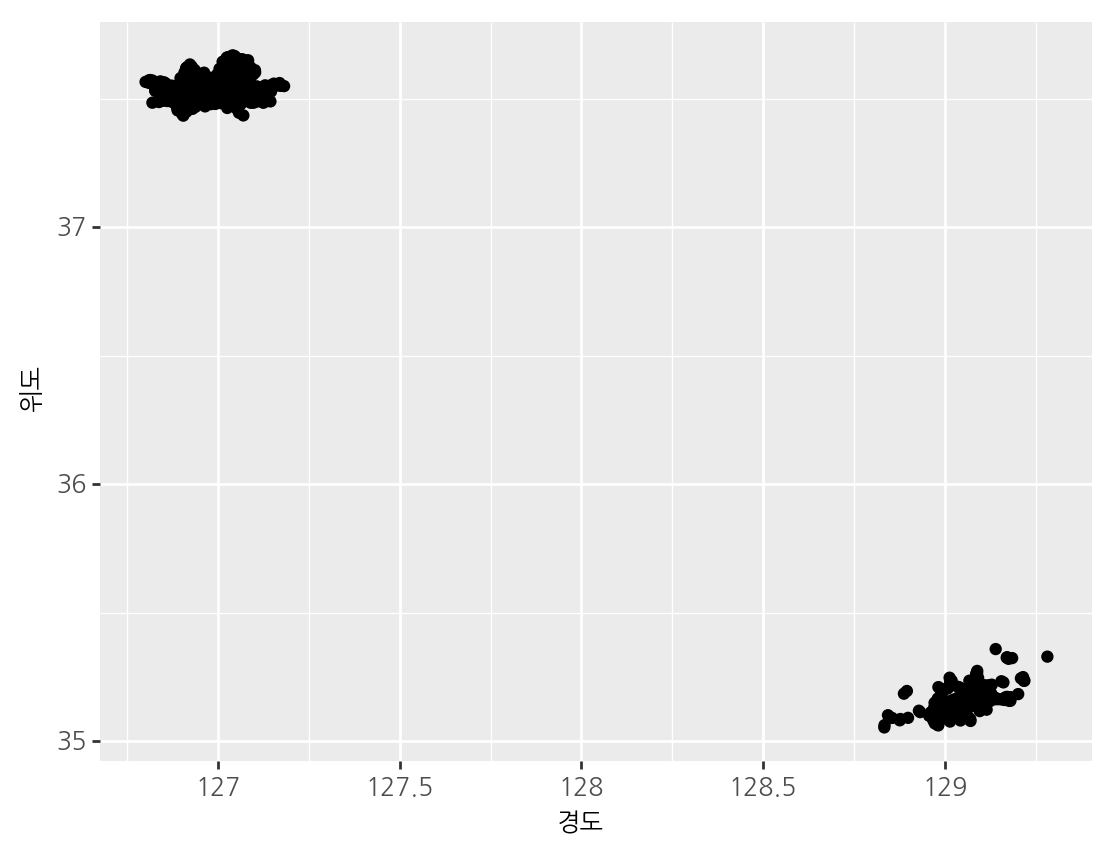

<ggplot: (-9223372036580358014)>

In [9]:
from plotnine import *

(ggplot(shop_201806_01[:1000])
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(fontproperties=font))
)

In [11]:
# 서울과 그 외 데이터로 나눈다
shop_seoul = shop_201806_01.loc[shop_201806_01['도로명주소'].str.startswith('서울')]
shop_except_seoul = shop_201806_01.loc[~shop_201806_01['도로명주소'].str.startswith('서울')]
print(shop_seoul.shape)
print(shop_except_seoul.shape)

(330089, 39)
(146094, 39)


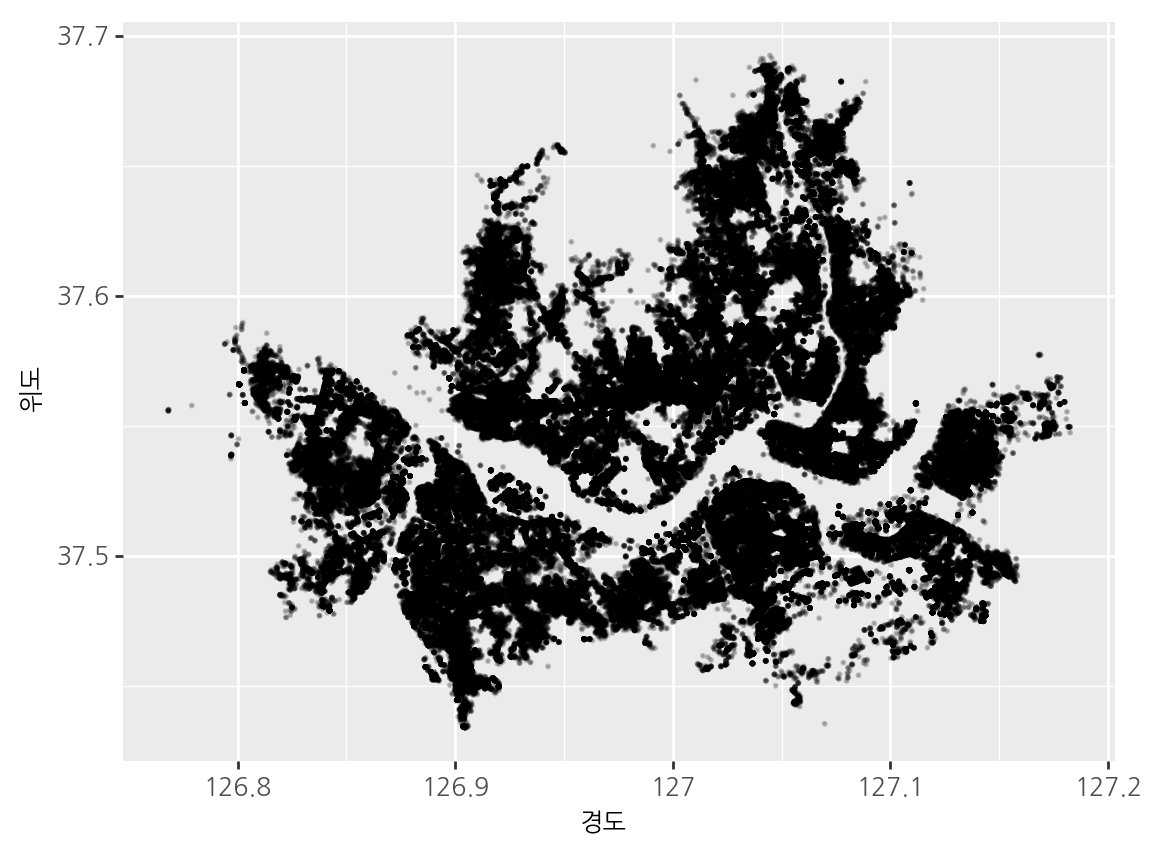

<ggplot: (-9223372036561929468)>

In [12]:
# 서울만 찍어서 지도 형태로 시각화
(ggplot(shop_seoul)
 + aes(x='경도', y='위도')
 + geom_point(color='black', alpha=0.2, size=0.2)
 + theme(text=element_text(fontproperties=font))
)

In [13]:
print(shop_201806_01.shape)
shop_201806_01['시도'] = shop_201806_01['도로명주소'].str.split(' ', expand=True)[0]
shop_201806_01['구군'] = shop_201806_01['도로명주소'].str.split(' ', expand=True)[1]
print(shop_201806_01.shape)
shop_201806_01.columns

(476183, 39)


(476183, 41)


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [14]:
# 서울 DF을 다시 만들어 준다.
shop_seoul = shop_201806_01.loc[shop_201806_01['도로명주소'].str.startswith('서울')]
shop_seoul.shape

(330089, 41)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


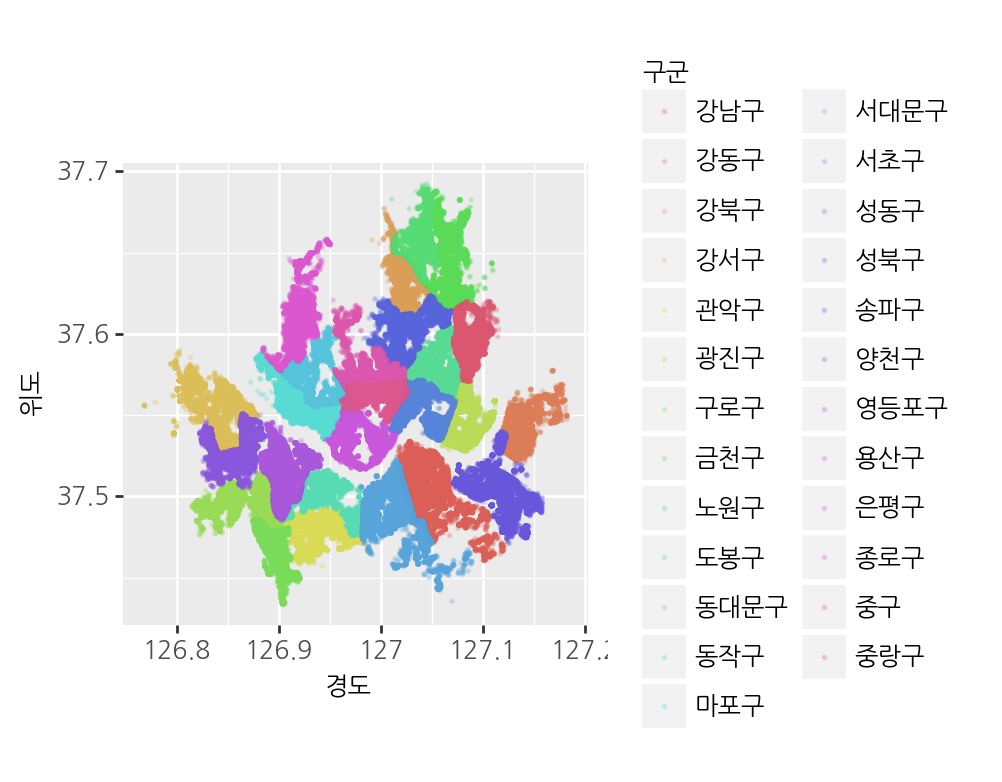

<ggplot: (316641975)>

In [34]:
# https://plotnine.readthedocs.io/en/stable/_modules/plotnine/ggplot.html
(ggplot(shop_seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point(alpha=0.2, size=0.2)
 + theme(text=element_text(fontproperties=font), figure_size=(3,3))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [35]:
shop_seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


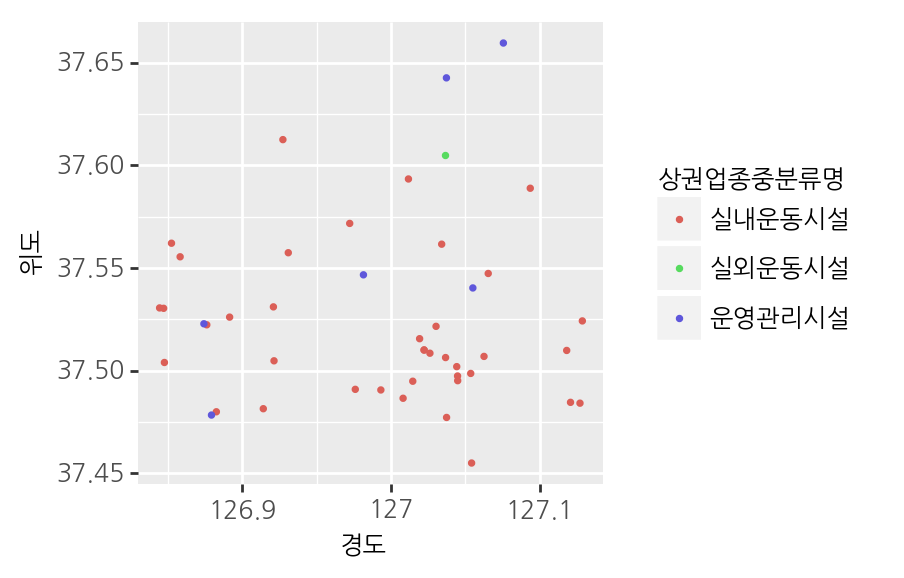

<ggplot: (316318135)>

In [36]:
shop_seoul_edu = shop_seoul.loc[shop_seoul['상권업종대분류명'] == '스포츠']

(ggplot(shop_seoul_edu)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point(size=0.5)
 + theme(text=element_text(fontproperties=font), figure_size=(3,3))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


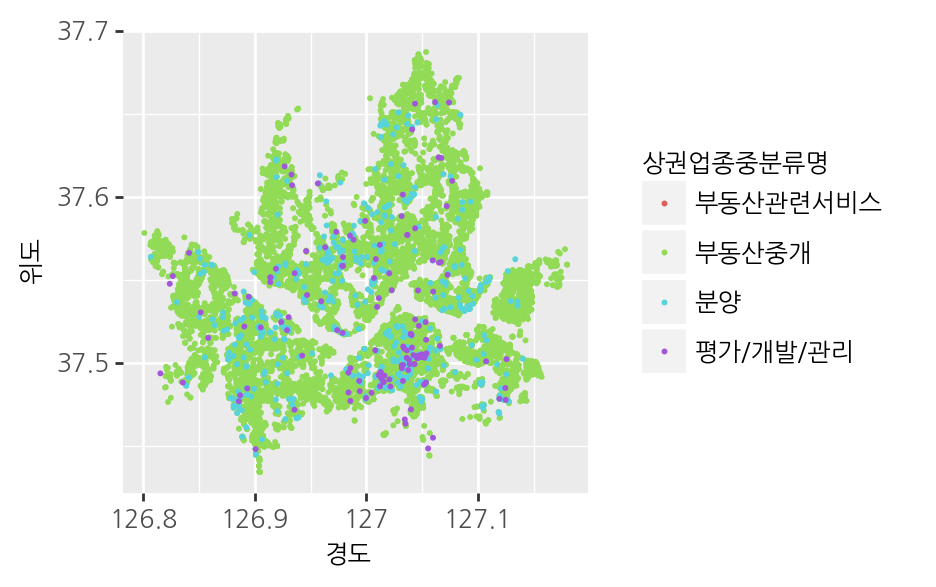

<ggplot: (-9223372036580350362)>

In [37]:
shop_seoul_edu = shop_seoul.loc[shop_seoul['상권업종대분류명'] == '부동산']

(ggplot(shop_seoul_edu)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point(size=0.2)
 + theme(text=element_text(fontproperties=font), figure_size=(3,3))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


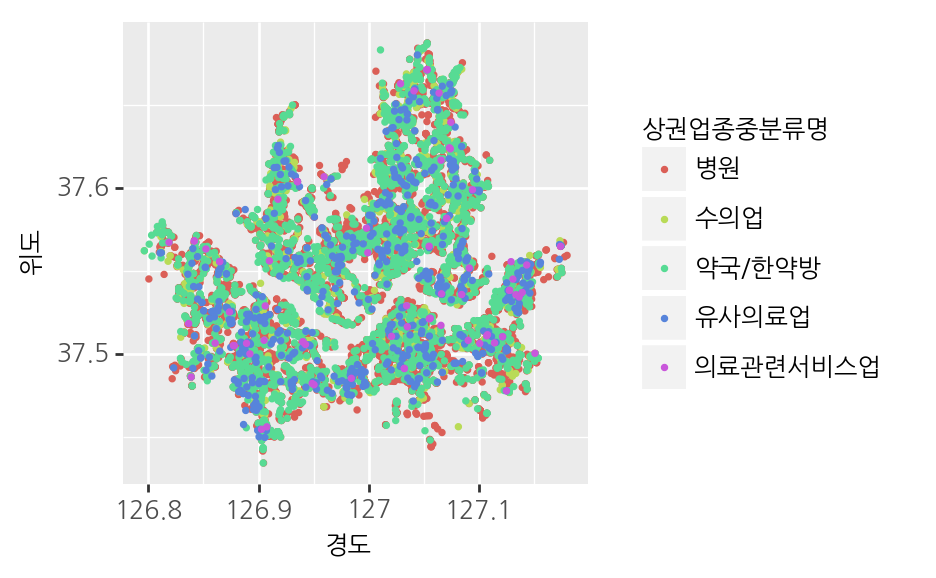

<ggplot: (392922439)>

In [38]:
shop_seoul_edu = shop_seoul.loc[shop_seoul['상권업종대분류명'] == '의료']

(ggplot(shop_seoul_edu)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point(size=0.5)
 + theme(text=element_text(fontproperties=font), figure_size=(3,3))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)